<a href="https://colab.research.google.com/github/alexradecki/cis335/blob/main/Asssignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alex Radecki CIS 335 Assignment 4**

Import cancer dataset

Import pandas, load the csv into a dataframe and validate dataset imported successfully

In [1]:
from google.colab import files
files.upload()

import pandas as pd
df = pd.read_csv("cancer_dataset.csv")
df.head()

Saving cancer_dataset.csv to cancer_dataset.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Cleaning and Scatterplot Prep

Remove the "id" and "Unnamed: 32" columns

In [ ]:
df = df.drop(['id'] , axis = 1)
df = df.drop(['Unnamed: 32'] , axis = 1)

Converts diagnosis into numeric binary value

In [ ]:
df.loc[df["diagnosis"] == "M", "diagnosis"] = 1
df.loc[df["diagnosis"] == "B", "diagnosis"] = 0

Select area_mean and smoothness_mean as our 2 features

In [ ]:
features = ['area_mean', 'smoothness_mean']

Creates the X and Y, X holding the feature and y holding the target column, diagnosis. Verifies diagnosis values are integers

In [ ]:
X = df[features]
Y = df['diagnosis']

Y = Y.astype('int')

Ensure X contains our desired features, "area_mean" and "smoothness_mean"

In [ ]:
print(X)
print(type(X))

     area_mean  smoothness_mean
0       1001.0          0.11840
1       1326.0          0.08474
2       1203.0          0.10960
3        386.1          0.14250
4       1297.0          0.10030
..         ...              ...
444      990.0          0.08947
445      441.3          0.10300
446      981.6          0.09997
447      674.8          0.09179
448      659.7          0.08388

[449 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


Performs z-score and min-max normalization on the feature values

In [ ]:
X_zscore = (X - X.mean()) / (X.std())

X_minmax = (X - X.min()) / (X.max() - X.min())

Convert the dataframes into numpy arrays.

In [ ]:
X = X.to_numpy()
X_zscore = X_zscore.to_numpy()
X_minmax = X_minmax.to_numpy()

Y = Y.to_numpy()

# Raw Data Scatterplot

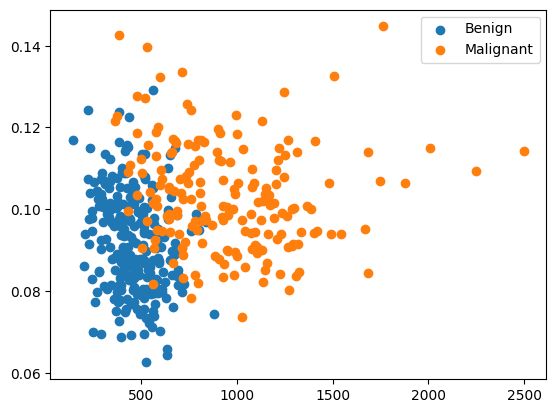

In [ ]:
from matplotlib import pyplot as plt
from numpy import where
labels = ['Benign', 'Malignant']

fig, ax = plt.subplots()

for class_value in range(2):
  row_ix = where(Y==class_value)
  ax.scatter(X[row_ix, 0], X[row_ix, 1], label=labels[class_value])

ax.legend()
plt.show()

# KMeans Clustering

Creates KMeans cluster model, No normalization

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


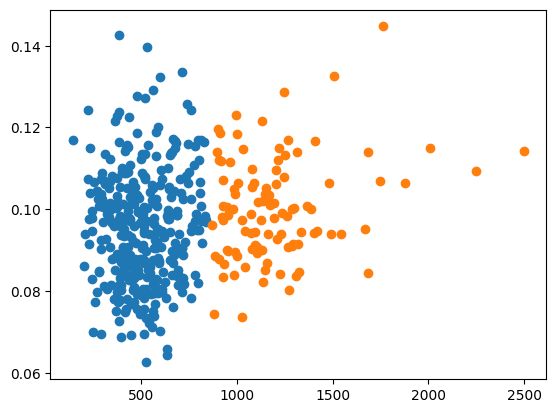

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(X)
yhat_kmeans = model.predict(X)

fig, ax = plt.subplots()
for class_value in range(2):
  row_ix = where(yhat_kmeans==class_value)
  ax.scatter(X[row_ix, 0], X[row_ix, 1], label=labels[class_value])

plt.show()


Creates KMeans cluster model, Z-score normalization

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


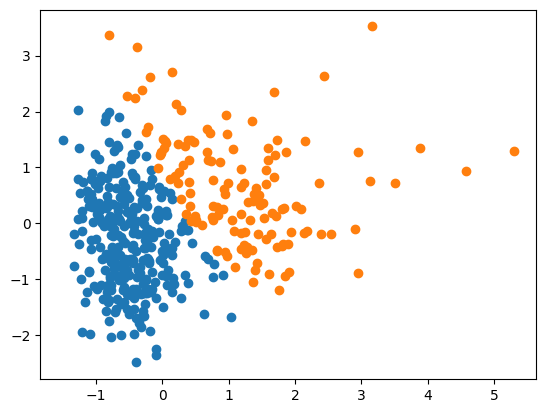

In [ ]:
model_zscore = KMeans(n_clusters=2)
model_zscore.fit(X_zscore)
yhat_kmeans_zscore = model_zscore.predict(X_zscore)

fig, ax = plt.subplots()
for class_value in range(2):
  row_ix = where(yhat_kmeans_zscore==class_value)
  ax.scatter(X_zscore[row_ix, 0], X_zscore[row_ix, 1], label=labels[class_value])

plt.show()

Creates KMeans clustering model, Min-max normalization

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


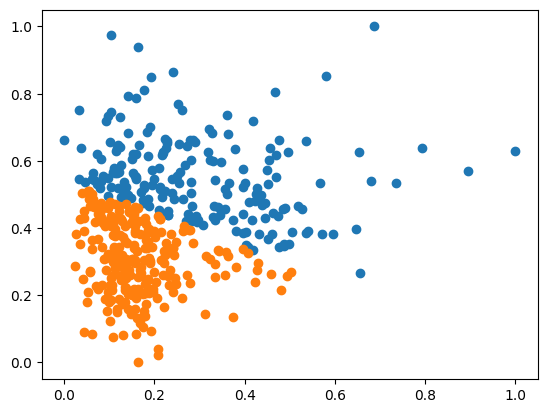

In [ ]:
model_minmax = KMeans(n_clusters=2)
model_minmax.fit(X_minmax)
yhat_kmeans_minmax = model_minmax.predict(X_minmax)

fig, ax = plt.subplots()
for class_value in range(2):
  row_ix = where(yhat_kmeans_minmax==class_value)
  ax.scatter(X_minmax[row_ix, 0], X_minmax[row_ix, 1], label=labels[class_value])

plt.show()

# KMedoids Clustering

Installs scikit-learn-extra for KMedoids

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.0 MB/s eta 0:00:00


Creates KMedoids clustering model, No normalization

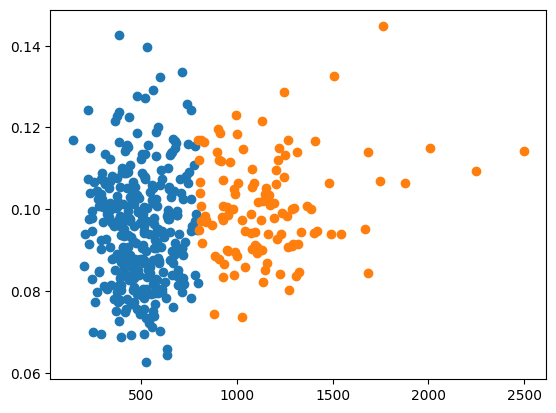

In [ ]:
from sklearn_extra.cluster import KMedoids

medoid_model = KMedoids(n_clusters=2, random_state=0).fit(X)
yhat_kemdoids = medoid_model.predict(X)

fig, ax = plt.subplots()
for class_value in range(2):
  row_ix = where(yhat_kemdoids==class_value)
  ax.scatter(X[row_ix, 0], X[row_ix, 1], label=labels[class_value]) # x axis has feature no 1 and y axis has feature no 2

plt.show()


Creates KMedoids clustering model, Z-score normalization

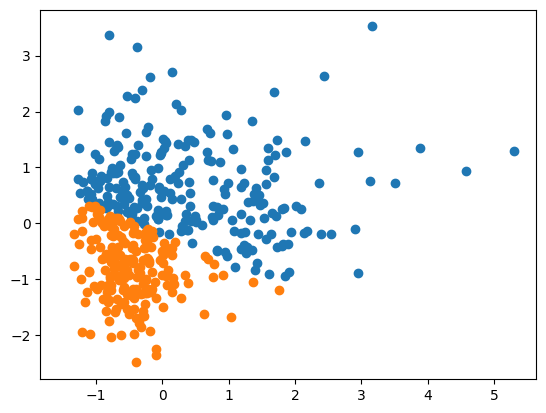

In [ ]:
medoid_model_zscore = KMedoids(n_clusters=2, random_state=0).fit(X_zscore)
yhat_kemdoids_zscore = medoid_model_zscore.predict(X_zscore)

fig, ax = plt.subplots()
for class_value in range(2):
  row_ix = where(yhat_kemdoids_zscore==class_value)
  ax.scatter(X_zscore[row_ix, 0], X_zscore[row_ix, 1], label=labels[class_value])

plt.show()

Creates KMedoids clustering model, Min-max normalization

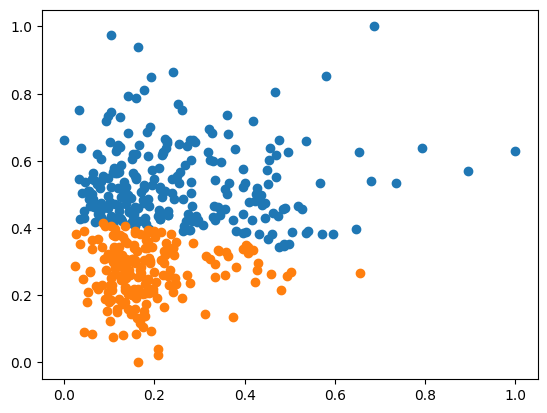

In [ ]:
medoid_model_minmax = KMedoids(n_clusters=2, random_state=0).fit(X_minmax)
yhat_kemdoids_minmax = medoid_model_minmax.predict(X_minmax)

fig, ax = plt.subplots()
for class_value in range(2):
  row_ix = where(yhat_kemdoids_minmax==class_value)
  ax.scatter(X_minmax[row_ix, 0], X_minmax[row_ix, 1], label=labels[class_value])

plt.show()